# Remote Datasets

Data can live in a variety of places. `scmdata` provides some routines to make it easy to fetch data in an automatic method.

In [1]:
import scmdata
import pandas as pd

/home/jared/code/uom/scmdata/src/scmdata/database/_database.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


In [2]:
pd.set_option("display.width", 250)
pd.set_option("display.max_columns", 15)
pd.set_option("display.max_colwidth", 80)
pd.set_option("display.min_rows", 20)

## Remote files

The simplest example would be reading CSV or excel data served via HTTP/HTTPS.

Rather than manually downloading the data and reading the local copy the data can be read directly.

In [3]:
remote_url = "https://raw.githubusercontent.com/openscm/scmdata/master/tests/test_data/rcp26_emissions.csv"

run = scmdata.ScmRun(remote_url, lowercase_cols=True)
run

<ScmRun (timeseries: 39, timepoints: 736)>
Time:
	Start: 1765-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	   climate_model  model region scenario               unit                                    variable
	0    unspecified  IMAGE  World    RCP26         Mt BC / yr                                Emissions|BC
	1    unspecified  IMAGE  World    RCP26       kt C2F6 / yr                              Emissions|C2F6
	2    unspecified  IMAGE  World    RCP26      kt C6F14 / yr                             Emissions|C6F14
	3    unspecified  IMAGE  World    RCP26       kt CCl4 / yr                              Emissions|CCl4
	4    unspecified  IMAGE  World    RCP26        kt CF4 / yr                               Emissions|CF4
	5    unspecified  IMAGE  World    RCP26      kt CFC11 / yr                             Emissions|CFC11
	6    unspecified  IMAGE  World    RCP26     kt CFC113 / yr                            Emissions|CFC113
	7    unspecified  IMAGE  World    RCP26     kt CFC114 / yr

`scmdata.ScmRun` supports a range of URL schemes include http, ftp, s3, gs, and file. Behind the scenes `pandas` is used to fetch the data. For more information about the remote formats that can be read, see the ``pd.read_csv`` documentation for the version of pandas which is installed.

## API-based Datasets

Some data sources may be served via an API to make it easy to consume in various ways. Rather than serving a single CSV file, an API allows users to query just the data that is required.

Below we use the NDC dataset developed by [Climate Resource](https://www.climate-resource.com/tools/ndcs). This dataset is in an early release and the API and the underlying data may change without warnings. It should also be noted that this dataset is provided with an [CC Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode) license which requires attribution and limits the data to only being used for non-commerical purposes.

In [4]:
NDCS_URL = "https://api.climateresource.com.au/ndcs/v1"

In [5]:
print(scmdata.RemoteDataset.__init__.__doc__)


        To write once happy with interface

        Parameters
        ----------
        base_url
            Url of API
        filters
            Default filters

            Shorthand for calling ``RemoteDataset(url).filter(**filters)``
        


In [6]:
ds = scmdata.RemoteDataset(NDCS_URL)
ds

<RemoteDataset> (timeseries: 25014)
URL: https://api.climateresource.com.au/ndcs/v1/timeseries?format=csv
Filters
	{}
Meta
	      ambition     category conditionality  hot_air        model  model_version region   scenario              unit                            variable
	0          NaN   Historical    conditional  include  CR NDC tool  14Feb2022b_CR    IRN  Reference       Mt CO2eq/yr    Emissions|Total GHG excl. LULUCF
	1          NaN   Historical    conditional  include  CR NDC tool  14Feb2022b_CR    IRN  Reference       Mt CO2eq/yr          Emissions|Reference LULUCF
	2          NaN   Historical    conditional  include  CR NDC tool  14Feb2022b_CR    IRN        NaN       Mt CO2eq/yr  Emissions|Covered GHG incl. LULUCF
	3          low       Cancun    conditional  include  CR NDC tool  14Feb2022b_CR    IRN        NaN       Mt CO2eq/yr                       Cancun Pledge
	4         high       Cancun    conditional  include  CR NDC tool  14Feb2022b_CR    IRN        NaN       Mt CO2e

The `RemoteDataset` can be filtered in a similar way to `scmdata.ScmRun`. This includes the use of "*"'s to match multiple items.

Any subsequent operations will include data that matches the filter.

In [7]:
ghg_ds = ds.filter(variable="Emissions|Total GHG*", category="Current")
ghg_ds

<RemoteDataset> (timeseries: 2352)
URL: https://api.climateresource.com.au/ndcs/v1/timeseries?variable=Emissions%7CTotal+GHG%2A&category=Current&format=csv
Filters
	{'variable': 'Emissions|Total GHG*', 'category': 'Current'}
Meta
	     ambition category conditionality  hot_air        model  model_version region  scenario         unit                          variable
	0         low  Current    conditional  include  CR NDC tool  14Feb2022b_CR    IRN       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	1        high  Current    conditional  include  CR NDC tool  14Feb2022b_CR    IRN       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	2         low  Current    conditional  include  CR NDC tool  14Feb2022b_CR    ZWE       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	3        high  Current    conditional  include  CR NDC tool  14Feb2022b_CR    ZWE       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	4         low  Current    conditional  include  CR NDC tool  14Feb202

But how do you find what data are available?

The `meta` function allows users to query what timeseries are available. The dataset is able to be filtered by any of the returned columns along with some additional helper filters ('year.min' and 'year.max').

In [8]:
ghg_ds.meta()

,ambition,category,conditionality,hot_air,model,model_version,region,scenario,unit,variable
0,low,Current,conditional,include,CR NDC tool,14Feb2022b_CR,IRN,NaN,Mt CO2eq/yr,Emissions|Total GHG excl. LULUCF
1,high,Current,conditional,include,CR NDC tool,14Feb2022b_CR,IRN,NaN,Mt CO2eq/yr,Emissions|Total GHG excl. LULUCF
2,low,Current,conditional,include,CR NDC tool,14Feb2022b_CR,ZWE,NaN,Mt CO2eq/yr,Emissions|Total GHG excl. LULUCF
3,high,Current,conditional,include,CR NDC tool,14Feb2022b_CR,ZWE,NaN,Mt CO2eq/yr,Emissions|Total GHG excl. LULUCF
4,low,Current,conditional,include,CR NDC tool,14Feb2022b_CR,PER,NaN,Mt CO2eq/yr,Emissions|Total GHG excl. LULUCF
5,high,Current,conditional,include,CR NDC tool,14Feb2022b_CR,PER,NaN,Mt CO2eq/yr,Emissions|Total GHG excl. LULUCF
6,low,Current,conditional,include,CR NDC tool,14Feb2022b_CR,GAB,NaN,Mt CO2eq/yr,Emissions|Total GHG excl. LULUCF
7,high,Current,conditional,include,CR NDC tool,14Feb2022b_CR,GAB,NaN,Mt CO2eq/yr,Emissions|Total GHG excl. LULUCF
8,low,Current,conditional,include,CR NDC tool,14Feb2022b_CR,PHL,NaN,Mt CO2eq/yr,Emissions|Total GHG excl. LULUCF
9,high,Current,conditional,include,CR NDC tool,14Feb2022b_CR,PHL,NaN,Mt CO2eq/yr,Emissions|Total GHG excl. LULUCF


In [9]:
# A complete list of filters
ghg_ds.filter_options()

['ambition',
 'category',
 'conditionality',
 'hot_air',
 'model',
 'model_version',
 'region',
 'scenario',
 'unit',
 'variable',
 'year.min',
 'year.max']

In [10]:
ghg_ds = ghg_ds.filter(**{"year.min": "2010", "year.max": "2030"})

The available timeseries can then be queried. This fetches the timeseries matching the requested filter from the server.
The resulting `scmdata.ScmRun` object is returned to perform additional operations.

The `scmdata.ScmRun` also includes an additional metadata property `source` that is set to the `RemoteDataset` that was used to fetch the data.

In [11]:
ghg_data = ghg_ds.query()
ghg_data

<ScmRun (timeseries: 2352, timepoints: 21)>
Time:
	Start: 2010-01-01T00:00:00
	End: 2030-01-01T00:00:00
Meta:
	     ambition category conditionality  hot_air        model  model_version region  scenario         unit                          variable
	0         low  Current    conditional  include  CR NDC tool  14Feb2022b_CR    IRN       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	1        high  Current    conditional  include  CR NDC tool  14Feb2022b_CR    IRN       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	2         low  Current    conditional  include  CR NDC tool  14Feb2022b_CR    ZWE       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	3        high  Current    conditional  include  CR NDC tool  14Feb2022b_CR    ZWE       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	4         low  Current    conditional  include  CR NDC tool  14Feb2022b_CR    PER       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	5        high  Current    conditional  include  C

In [12]:
ghg_data.metadata["source"]

<RemoteDataset> (timeseries: 2352)
URL: https://api.climateresource.com.au/ndcs/v1/timeseries?variable=Emissions%7CTotal+GHG%2A&category=Current&year.min=2010&year.max=2030&format=csv
Filters
	{'variable': 'Emissions|Total GHG*', 'category': 'Current', 'year.min': '2010', 'year.max': '2030'}
Meta
	     ambition category conditionality  hot_air        model  model_version region  scenario         unit                          variable
	0         low  Current    conditional  include  CR NDC tool  14Feb2022b_CR    IRN       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	1        high  Current    conditional  include  CR NDC tool  14Feb2022b_CR    IRN       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	2         low  Current    conditional  include  CR NDC tool  14Feb2022b_CR    ZWE       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	3        high  Current    conditional  include  CR NDC tool  14Feb2022b_CR    ZWE       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	4

Alternatively, `scmdata.ScmRun` functions can be called directly. The underlying timeseries is queried automatically.

In [13]:
ghg_ds.process_over("region", "sum")

time                                                                                                                        2010-01-01    2011-01-01    2012-01-01    2013-01-01    2014-01-01    2015-01-01    2016-01-01  ...    2024-01-01  \
ambition category conditionality hot_air model       model_version scenario unit        variable                                                                                                                            ...                 
high     Current  conditional    exclude CR NDC tool 14Feb2022b_CR NaN      Mt CO2eq/yr Emissions|Total GHG excl. LULUCF  44668.155687  46160.345258  46923.146403  47122.398589  47741.252729  47812.708918  47867.697916  ...  49324.041096   
                  range          exclude CR NDC tool 14Feb2022b_CR NaN      Mt CO2eq/yr Emissions|Total GHG excl. LULUCF  44668.155687  46160.345258  46923.146403  47122.398589  47741.252729  47812.708918  47867.697916  ...  49324.041096   
                  unconditional  exclude CR NDC tool 14Feb2022b_CR NaN      Mt CO2eq/yr Emissions|Total GHG excl. LULUCF  44668.155687  46160.345258  46923.146403  47122.398589  47741.252729  47812.708918  47867.697916  ...  50297.160911   
low      Current  conditional    exclude CR NDC tool 14Feb2022b_CR NaN      Mt CO2eq/yr Emissions|Total GHG excl. LULUCF  44668.155687  46160.345258  46923.146403  47122.398589  47741.252729  47812.708918  47867.697916  ...  50594.592109   
                  range          exclude CR NDC tool 14Feb2022b_CR NaN      Mt CO2eq/yr Emissions|Total GHG excl. LULUCF  44668.155687  46160.345258  46923.146403  47122.398589  47741.252729  47812.708918  47867.697916  ...  51468.071987   
                  unconditional  exclude CR NDC tool 14Feb2022b_CR NaN      Mt CO2eq/yr Emissions|Total GHG excl. LULUCF  44668.155687  46160.345258  46923.146403  47122.398589  47741.252729  47812.708918  47867.697916  ...  51468.071987   
high     Current  conditional    include CR NDC tool 14Feb2022b_CR NaN      Mt CO2eq/yr Emissions|Total GHG excl. LULUCF  44668.155687  46160.345258  46923.146403  47122.398589  47741.252729  47812.708918  47867.697916  ...  49729.929403   
                  range          include CR NDC tool 14Feb2022b_CR NaN      Mt CO2eq/yr Emissions|Total GHG excl. LULUCF  44668.155687  46160.345258  46923.146403  47122.398589  47741.252729  47812.708918  47867.697916  ...  49729.929403   
                  unconditional  include CR NDC tool 14Feb2022b_CR NaN      Mt CO2eq/yr Emissions|Total GHG excl. LULUCF  44668.155687  46160.345258  46923.146403  47122.398589  47741.252729  47812.708918  47867.697916  ...  51257.974976   
low      Current  conditional    include CR NDC tool 14Feb2022b_CR NaN      Mt CO2eq/yr Emissions|Total GHG excl. LULUCF  44668.155687  46160.345258  46923.146403  47122.398589  47741.252729  47812.708918  47867.697916  ...  51296.281472   
                  range          include CR NDC tool 14Feb2022b_CR NaN      Mt CO2eq/yr Emissions|Total GHG excl. LULUCF  44668.155687  46160.345258  46923.146403  47122.398589  47741.252729  47812.708918  47867.697916  ...  52652.471355   
                  unconditional  include CR NDC tool 14Feb2022b_CR NaN      Mt CO2eq/yr Emissions|Total GHG excl. LULUCF  44668.155687  46160.345258  46923.146403  47122.398589  47741.252729  47812.708918  47867.697916  ...  52652.471355   

time                                                                                                                        2025-01-01    2026-01-01    2027-01-01    2028-01-01    2029-01-01    2030-01-01  
ambition category conditionality hot_air model       model_version scenario unit        variable                                                                                                              
high     Current  conditional    exclude CR NDC tool 14Feb2022b_CR NaN      Mt CO2eq/yr Emissions|Total GHG excl. LULUCF  49260.708361  48976.076791  48691.445227  48406.813672  48122.182100  47837.550540  
    

<AxesSubplot:xlabel='time', ylabel='Mt CO2eq/yr'>

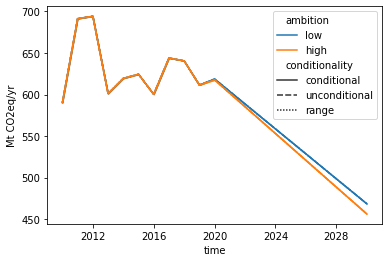

In [14]:
ghg_ds.filter(region='AUS').lineplot(hue="ambition", style="conditionality")

For notebooks which are commonly run, it might be useful to cache the timeseries so it doesn't need to be downloaded on each run.

We recommend using `pooch` to cache the results of a query locally.

In [18]:
import pooch

cached_fname = pooch.retrieve(
    scmdata.RemoteDataset(NDCS_URL).filter(
        version="14Feb2022b_CR",
        variable="Emissions|Total GHG*",
        category="Current"
    ).url(),
    known_hash="f28947623e785d3586628c9421b6cb10b8e7f94c103da3fb25369e69dedc3c83",
    fname="ndcs-latest.csv"
)

scmdata.ScmRun(cached_fname)

<ScmRun (timeseries: 2352, timepoints: 41)>
Time:
	Start: 1990-01-01T00:00:00
	End: 2030-01-01T00:00:00
Meta:
	     ambition category conditionality  hot_air        model  model_version region  scenario         unit                          variable
	0         low  Current    conditional  include  CR NDC tool  14Feb2022b_CR    IRN       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	1        high  Current    conditional  include  CR NDC tool  14Feb2022b_CR    IRN       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	2         low  Current    conditional  include  CR NDC tool  14Feb2022b_CR    ZWE       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	3        high  Current    conditional  include  CR NDC tool  14Feb2022b_CR    ZWE       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	4         low  Current    conditional  include  CR NDC tool  14Feb2022b_CR    PER       NaN  Mt CO2eq/yr  Emissions|Total GHG excl. LULUCF
	5        high  Current    conditional  include  C